In [2]:
import numpy as np
import matplotlib.pyplot as plt
  
import torch
import torch.nn as nn
import numpy as np
from copy import deepcopy

In [3]:
TCDF_morning = np.load('TCDF_morning.npy')
TCDF_afternoon = np.load('TCDF_afternoon.npy')
TCDF_evening = np.load('TCDF_evening.npy')

In [4]:
sum(TCDF_morning)

array([ 0.,  0.,  0.,  3., 31.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,
        0.,  2.,  0.,  0.,  0., 37.,  0.,  7.,  3.,  0.,  0.,  0.,  0.,
        1.,  0., 14.,  0.,  0.,  0.,  1.,  1.,  1.,  0.,  0.,  0., 32.,
        0., 21.,  0.,  0.,  0., 10., 12.,  0.,  0., 11.,  0.,  0.,  5.,
        1.,  0.,  0.,  0.,  0.])

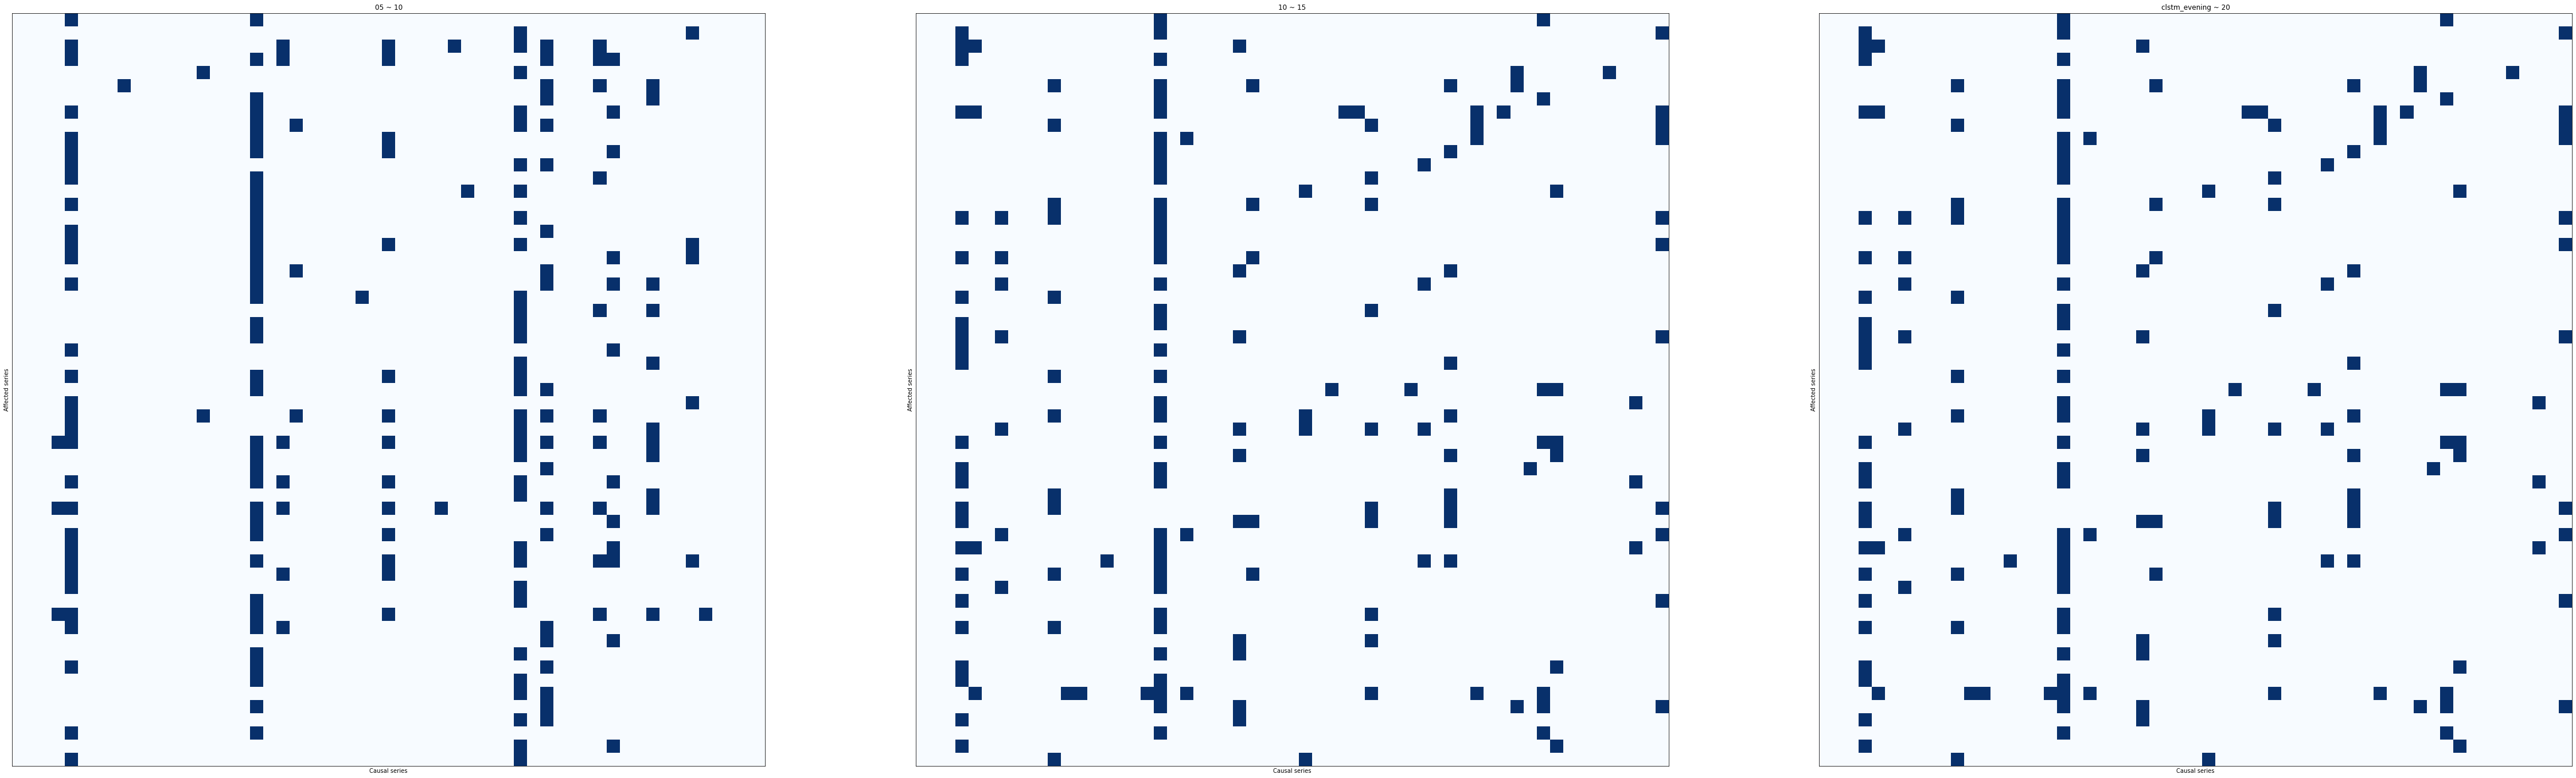

In [5]:
fig, axarr = plt.subplots(1, 3, figsize=(80, 40))
axarr[0].imshow(TCDF_morning, cmap='Blues')
axarr[0].set_title('05 ~ 10')
axarr[0].set_ylabel('Affected series')
axarr[0].set_xlabel('Causal series')
axarr[0].set_xticks([])
axarr[0].set_yticks([])

axarr[1].set_title('10 ~ 15')
axarr[1].imshow(TCDF_afternoon, cmap='Blues', vmin=0, vmax=1, extent=(0, len(TCDF_morning), len(TCDF_morning), 0))
axarr[1].set_ylabel('Affected series')
axarr[1].set_xlabel('Causal series')
axarr[1].set_xticks([])
axarr[1].set_yticks([])

axarr[2].set_title('clstm_evening ~ 20')
axarr[2].imshow(TCDF_afternoon, cmap='Blues', vmin=0, vmax=1, extent=(0, len(TCDF_afternoon), len(TCDF_afternoon), 0))
axarr[2].set_ylabel('Affected series')
axarr[2].set_xlabel('Causal series')
axarr[2].set_xticks([])
axarr[2].set_yticks([])


plt.show()

In [6]:
import pandas as pd
road = pd.read_csv('data/road_gang.csv')

In [7]:
road_name = road.columns
tcdf_causality_morning = pd.DataFrame(columns = ['cause','effect'])
for i in range(57):
    for j in range(57):
        if TCDF_morning[i][j] == 1:
            cause, effect = int(road_name[i]), int(road_name[j])
            tcdf_causality_morning = tcdf_causality_morning.append({'cause': cause, 'effect':effect},ignore_index = True)

In [7]:
tcdf_causality_morning

,cause,effect
0,1220029700,1220028200
1,1220029700,1220034500
2,1220032100,1220034100
3,1220032100,1220031800
4,1220033000,1220028200
...,...,...
189,1220034600,1220034500
190,1220032800,1220034100
191,1220032800,1220032900
192,1220026800,1220028200


In [8]:
map_info = pd.read_excel('C:/Users/chanyoung/Desktop/id_info.xlsx')

<ipython-input-8-5ddba9f1d02e>:1: FutureWarning: Your version of xlrd is 1.2.0. In xlrd >= 2.0, only the xls format is supported. As a result, the openpyxl engine will be used if it is installed and the engine argument is not specified. Install openpyxl instead.
  map_info = pd.read_excel('C:/Users/chanyoung/Desktop/id_info.xlsx')


In [9]:
import folium

In [10]:
m = folium.Map(location=[map_info[map_info['링크아이디'] == 1220029700]['latitude'].values[0],
                         map_info[map_info['링크아이디'] == 1220029700]['longitude'].values[0]], width=750, height=500)

for i in range(len(tcdf_causality_morning)):
    
    # cause road
    cause_latitude = map_info[map_info['링크아이디'] == tcdf_causality_morning['cause'][i]]['latitude'].values[0]
    cause_logtitude = map_info[map_info['링크아이디'] == tcdf_causality_morning['cause'][i]]['longitude'].values[0]
    folium.CircleMarker([cause_latitude, cause_logtitude],
                        radius=10,
                        color='red',
                        fill_color='#fffggg').add_to(m)
    
    # effect road
    effect_latitude = map_info[map_info['링크아이디'] == tcdf_causality_morning['effect'][i]]['latitude'].values[0]
    effect_logtitude = map_info[map_info['링크아이디'] == tcdf_causality_morning['effect'][i]]['longitude'].values[0]
    folium.CircleMarker([effect_latitude, effect_logtitude],
                        radius=10,
                        color='red',
                        fill_color='#fffggg').add_to(m)
    
    # cause-effect line
    folium.PolyLine([[cause_latitude,cause_logtitude], [effect_latitude, effect_logtitude]]).add_to(m)

m

In [11]:
tcdf_causality_evening = pd.DataFrame(columns = ['cause','effect'])
tcdf_causality_afternoon = pd.DataFrame(columns = ['cause','effect'])
for i in range(57):
    for j in range(57):
        if TCDF_evening[i][j] == 1:
            cause, effect = int(road_name[i]), int(road_name[j])
            tcdf_causality_evening = tcdf_causality_evening.append({'cause': cause, 'effect':effect},ignore_index = True)

for i in range(57):
    for j in range(57):
        if TCDF_afternoon[i][j] == 1:
            cause, effect = int(road_name[i]), int(road_name[j])
            tcdf_causality_afternoon = tcdf_causality_afternoon.append({'cause': cause, 'effect':effect},ignore_index = True)

In [12]:
m = folium.Map(location=[map_info[map_info['링크아이디'] == 1220029700]['latitude'].values[0],
                         map_info[map_info['링크아이디'] == 1220029700]['longitude'].values[0]], width=750, height=500)

for i in range(len(tcdf_causality_afternoon)):
    
    # cause road
    cause_latitude = map_info[map_info['링크아이디'] == tcdf_causality_afternoon['cause'][i]]['latitude'].values[0]
    cause_logtitude = map_info[map_info['링크아이디'] == tcdf_causality_afternoon['cause'][i]]['longitude'].values[0]
    folium.CircleMarker([cause_latitude, cause_logtitude],
                        radius=10,
                        color='red',
                        fill_color='#fffggg').add_to(m)
    
    # effect road
    effect_latitude = map_info[map_info['링크아이디'] == tcdf_causality_afternoon['effect'][i]]['latitude'].values[0]
    effect_logtitude = map_info[map_info['링크아이디'] == tcdf_causality_afternoon['effect'][i]]['longitude'].values[0]
    folium.CircleMarker([effect_latitude, effect_logtitude],
                        radius=10,
                        color='red',
                        fill_color='#fffggg').add_to(m)
    
    # cause-effect line
    folium.PolyLine([[cause_latitude,cause_logtitude], [effect_latitude, effect_logtitude]]).add_to(m)

m

In [13]:
m = folium.Map(location=[map_info[map_info['링크아이디'] == 1220029700]['latitude'].values[0],
                         map_info[map_info['링크아이디'] == 1220029700]['longitude'].values[0]], width=750, height=500)

for i in range(len(tcdf_causality_evening)):
    
    # cause road
    cause_latitude = map_info[map_info['링크아이디'] == tcdf_causality_evening['cause'][i]]['latitude'].values[0]
    cause_logtitude = map_info[map_info['링크아이디'] == tcdf_causality_evening['cause'][i]]['longitude'].values[0]
    folium.CircleMarker([cause_latitude, cause_logtitude],
                        radius=10,
                        color='red',
                        fill_color='#fffggg').add_to(m)
    
    # effect road
    effect_latitude = map_info[map_info['링크아이디'] == tcdf_causality_evening['effect'][i]]['latitude'].values[0]
    effect_logtitude = map_info[map_info['링크아이디'] == tcdf_causality_evening['effect'][i]]['longitude'].values[0]
    folium.CircleMarker([effect_latitude, effect_logtitude],
                        radius=10,
                        color='red',
                        fill_color='#fffggg').add_to(m)
    
    # cause-effect line
    folium.PolyLine([[cause_latitude,cause_logtitude], [effect_latitude, effect_logtitude]]).add_to(m)
m